In [11]:
import pandas
from pandas import DataFrame
import os
import logging
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO)
CLIMATE_DATA = '/users/runstache/Downloads/3267899.csv'

YEAR_RANGE = range(2017, 2023, 1)

In [12]:
# Load the CSV Data
if os.path.exists(CLIMATE_DATA):
    column_types = {
        'STATION': str,
        'NAME': str,
        'DATE': str,
        'PRCP': float,
        'SNOW': float,
        'TAVG': float,
        'TSUN': float
    }
    csv_df = pandas.read_csv(CLIMATE_DATA, sep=',', dtype=column_types, infer_datetime_format=True, parse_dates=['DATE'])
    climate_df = csv_df.fillna(0.0)
    
    climate_df['month_year'] = pandas.to_datetime(climate_df['DATE']).dt.year.astype(str) +  '-' + pandas.to_datetime(climate_df['DATE']).dt.month_name().str[:3]    
    climate_df['month_name'] = pandas.to_datetime(climate_df['DATE']).dt.month_name()
    climate_df['month_number'] = pandas.to_datetime(climate_df['DATE']).dt.month.astype('Int32')
    climate_df['year_value'] = pandas.to_datetime(climate_df['DATE']).dt.year.astype(str)
    print(climate_df.head())
    
else:
    climate_df = None
    logging.info('CSV File not Found')

       STATION                                     NAME       DATE  PRCP  \
0  USW00094823  PITTSBURGH INTERNATIONAL AIRPORT, PA US 1960-01-01  0.00   
1  USW00094823  PITTSBURGH INTERNATIONAL AIRPORT, PA US 1960-01-02  0.24   
2  USW00094823  PITTSBURGH INTERNATIONAL AIRPORT, PA US 1960-01-03  0.54   
3  USW00094823  PITTSBURGH INTERNATIONAL AIRPORT, PA US 1960-01-04  0.00   
4  USW00094823  PITTSBURGH INTERNATIONAL AIRPORT, PA US 1960-01-05  0.00   

   SNOW  TAVG  TSUN month_year month_name  month_number year_value  
0   0.0   0.0   0.0   1960-Jan    January             1       1960  
1   0.0   0.0   0.0   1960-Jan    January             1       1960  
2   0.0   0.0   0.0   1960-Jan    January             1       1960  
3   0.0   0.0   0.0   1960-Jan    January             1       1960  
4   0.0   0.0   0.0   1960-Jan    January             1       1960  


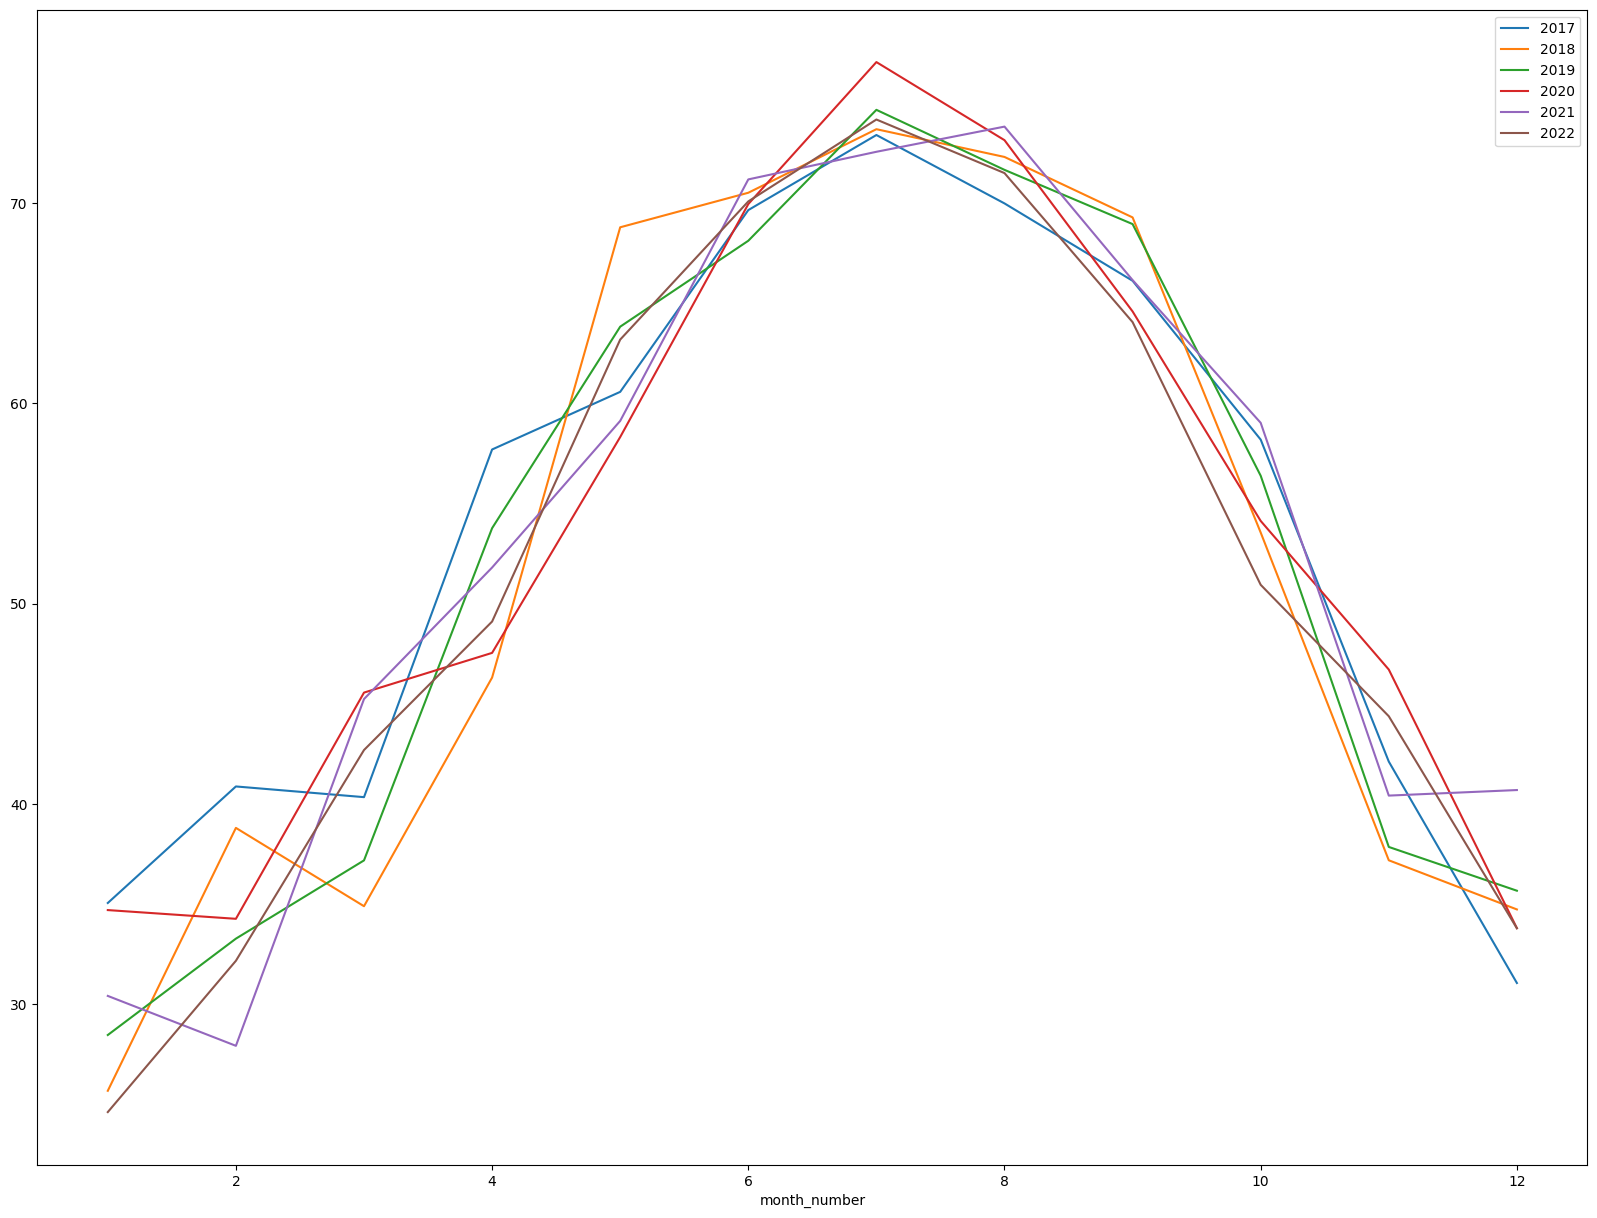

In [13]:
# Summarize the Temp Data
#temp_data = climate_df[(climate_df['TAVG'] > 0) & (climate_df['year_value'] == '1998')]
#temp_summary = temp_data.groupby('mon')['TAVG'].mean()

#print(temp_summary)
plt.figure(figsize=(20,15))

for year in YEAR_RANGE:
    climate_df[(climate_df['TAVG'] > 0) & (climate_df['year_value'] == str(year)) & (climate_df['STATION'] == 'USW00094823')].groupby('month_number')['TAVG'].mean().plot(label=str(year))
plt.legend()




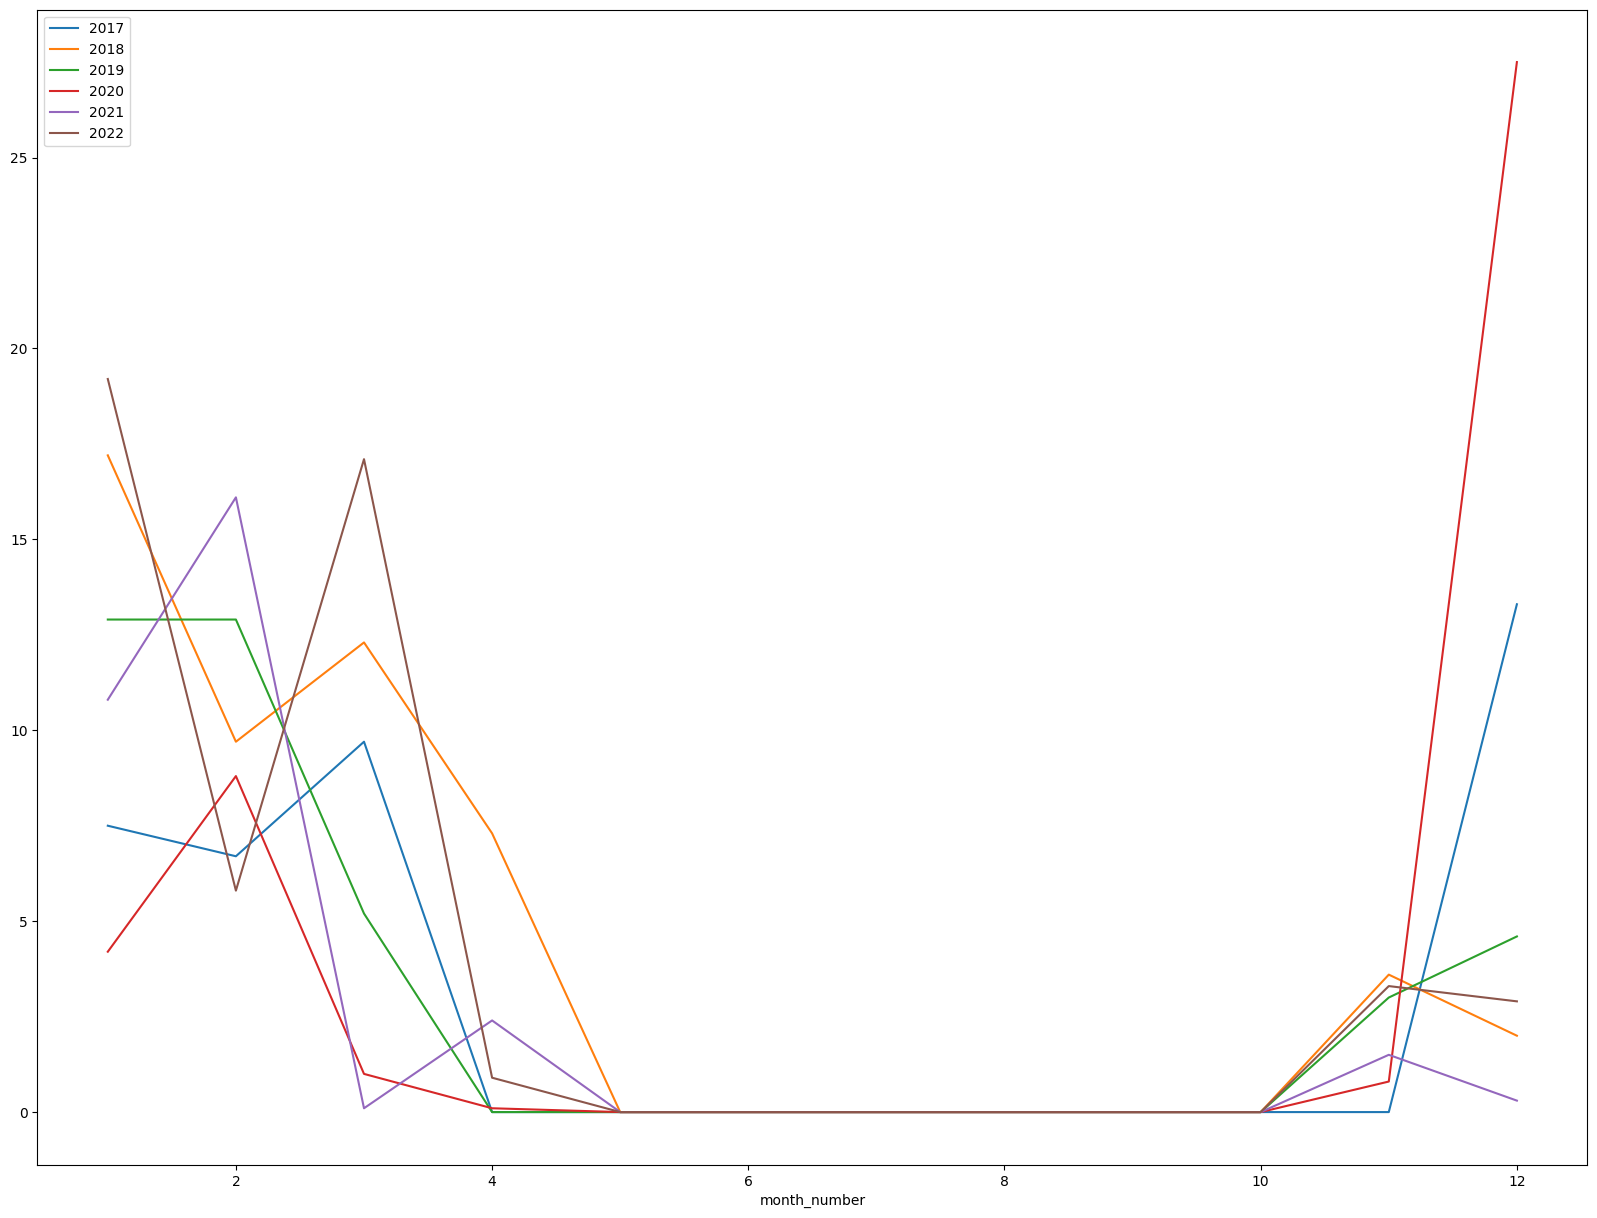

In [14]:
# Summarize the Snow Data
plt.figure(figsize=(20,15))
for year in YEAR_RANGE:
    climate_df[(climate_df['year_value'] == str(year)) & (climate_df['STATION'] == 'USW00094823')].groupby('month_number')['SNOW'].sum().plot(label=str(year))
    
plt.legend()

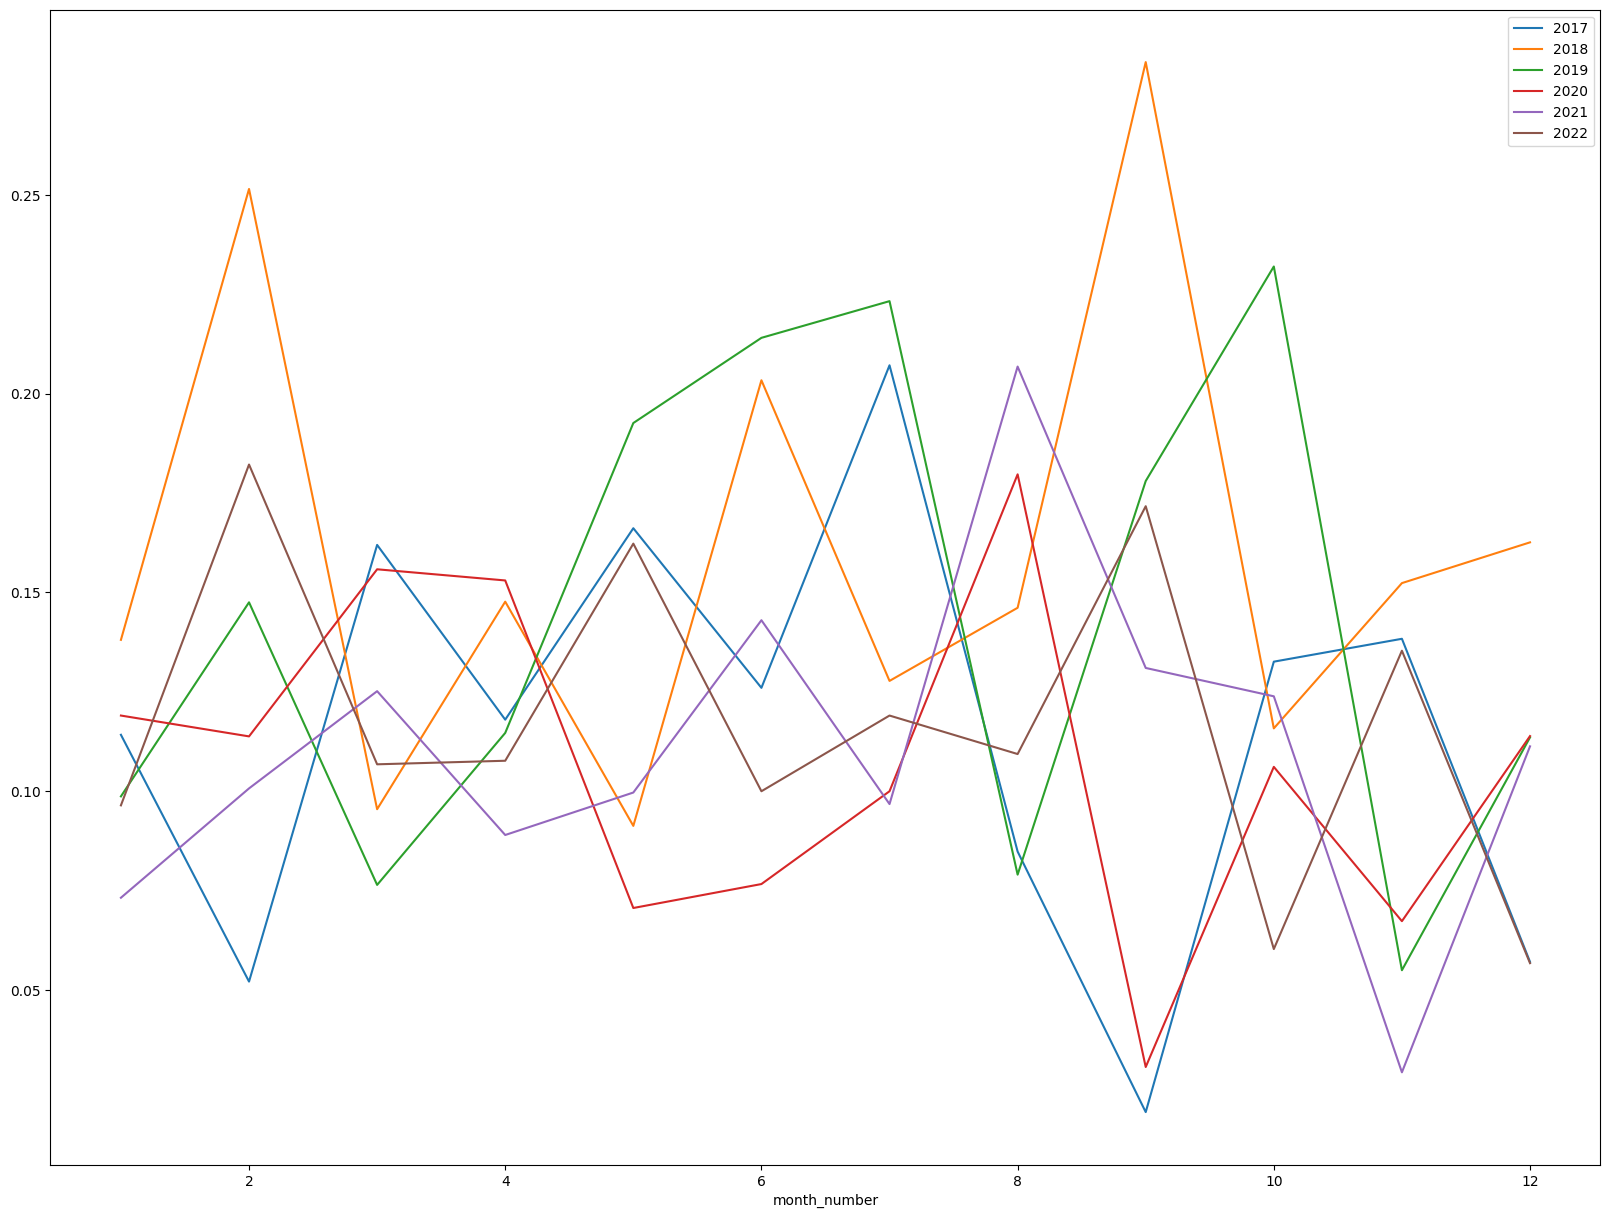

In [15]:
# Summarize the Precip Data
plt.figure(figsize=(20,15))
plt.xscale('linear')
for year in YEAR_RANGE:
    climate_df[(climate_df['year_value'] == str(year)) & (climate_df['STATION'] == 'USW00094823')].groupby('month_number')['PRCP'].mean().plot(label=str(year))
    
plt.legend()